<a href="https://colab.research.google.com/github/vini1lol/DataScience/blob/master/Data_Science_teste_estat%C3%ADstico_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
tmdb = pd.read_csv("/content/drive/My Drive/Data Science Alura /Data Science: introdução a testes estatísticos com python/tmdb_5000_movies.csv")

In [2]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Média de votos normalizado')

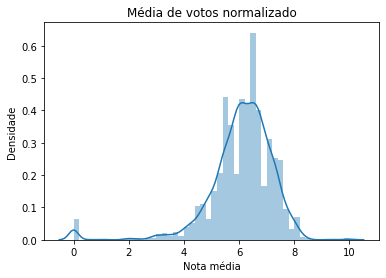

In [4]:
import seaborn as sns
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel="Nota média",ylabel = "Densidade")
ax.set_title("Média de votos normalizado")

Text(0.5, 1.0, 'Média de votos')

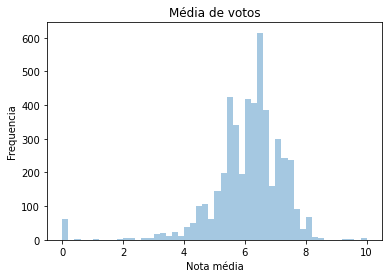

In [5]:
ax = sns.distplot(tmdb.vote_average,norm_hist= False, kde= False)
ax.set(xlabel="Nota média",ylabel = "Frequencia")
ax.set_title("Média de votos")

[Text(0.5, 0, 'Nota média do filme')]

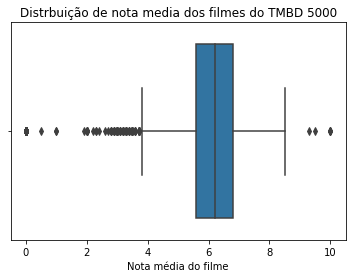

In [6]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set_title("Distrbuição de nota media dos filmes do TMBD 5000")
ax.set(xlabel="Nota média do filme")

In [7]:
tmdb.query("vote_average == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [8]:
tmdb_com_mais_de_10_votos=tmdb.query("vote_count>=10")
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Text(0.5, 1.0, 'Média de votos em filmes do TMDB 5000 com mais de 9 votos')

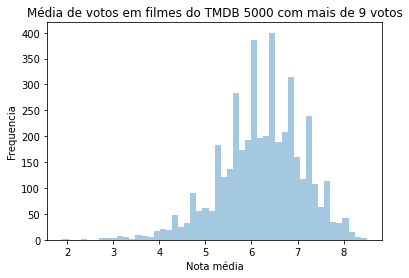

In [9]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,norm_hist= False, kde= False)
ax.set(xlabel="Nota média",ylabel = "Frequencia")
ax.set_title("Média de votos em filmes do TMDB 5000 com mais de 9 votos")

Text(0.5, 1.0, 'Média de votos em filmes do TMDB 5000 com mais de 9 votos')

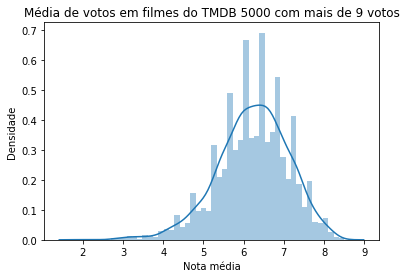

In [10]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média",ylabel = "Densidade")
ax.set_title("Média de votos em filmes do TMDB 5000 com mais de 9 votos")

[Text(0.5, 0, 'Nota média do filme')]

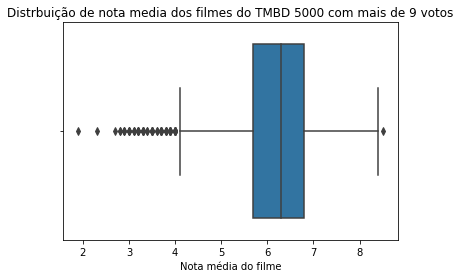

In [11]:
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set_title("Distrbuição de nota media dos filmes do TMBD 5000 com mais de 9 votos")
ax.set(xlabel="Nota média do filme")

#Analisando dados do MovieLens


In [12]:
notas = pd.read_csv("/content/drive/My Drive/Data Science Alura /Data Science: introdução a testes estatísticos com python/ml-latest-small/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes do MovieLens 100K')

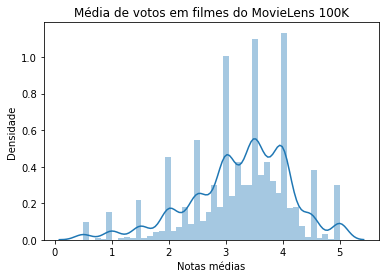

In [14]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel="Notas médias",ylabel="Densidade")
ax.set_title("Média de votos em filmes do MovieLens 100K")

In [15]:
quantidade_de_votos_por_filme=notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [16]:
nota_media_dos_filmes_com_pelo_menos_10_votos=nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]

Text(0.5, 1.0, 'Média de votos em filmes do MovieLens 100K com pelo menos 10 votos')

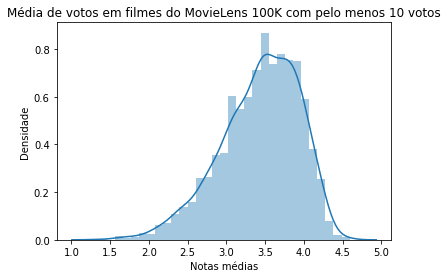

In [17]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Notas médias",ylabel="Densidade")
ax.set_title("Média de votos em filmes do MovieLens 100K com pelo menos 10 votos")

[Text(0.5, 0, 'Nota média do filme')]

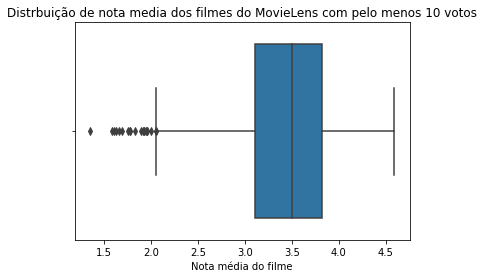

In [18]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set_title("Distrbuição de nota media dos filmes do MovieLens com pelo menos 10 votos")
ax.set(xlabel="Nota média do filme")

Text(0.5, 1.0, 'Média de votos em filmes do MovieLens 100K com pelo menos 10 votos')

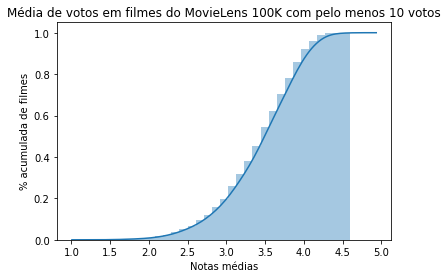

In [19]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,hist_kws={"cumulative":True},kde_kws={"cumulative":True})
ax.set(xlabel="Notas médias",ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes do MovieLens 100K com pelo menos 10 votos")

#Analisando a distribuição dos dados capturados de outros campos do TMDB 

In [20]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0.5, 1.0, 'Numero de votos de filmes do TMDB 5k com pelo menos 10 votos')

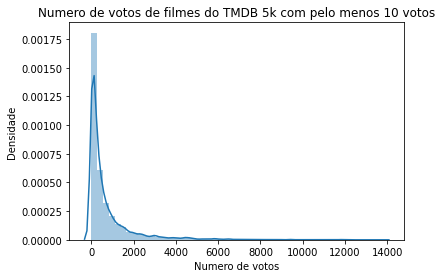

In [21]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel="Numero de votos",ylabel="Densidade")
ax.set_title("Numero de votos de filmes do TMDB 5k com pelo menos 10 votos")

In [22]:
tmdb.query("budget > 0").budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

Text(0.5, 1.0, 'Gastos por filme do TMDB 5k')

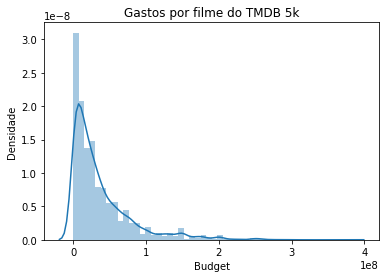

In [23]:
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel="Budget",ylabel="Densidade")
ax.set_title("Gastos por filme do TMDB 5k")

Text(0.5, 1.0, 'Popularidade por filme do TMDB 5k')

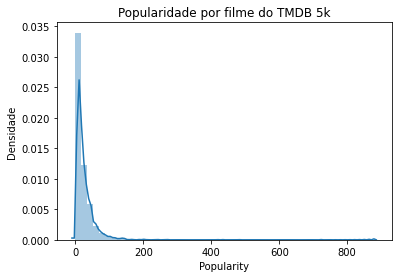

In [24]:
ax = sns.distplot(tmdb.popularity.values)
ax.set(xlabel="Popularity",ylabel="Densidade")
ax.set_title("Popularidade por filme do TMDB 5k")

In [25]:
tmdb.runtime.isnull().sum()

2

In [26]:
tmdb.query("runtime>0").runtime.dropna()

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4766, dtype: float64

Text(0.5, 1.0, 'Tempo de duração de um filme do TMDB 5k')

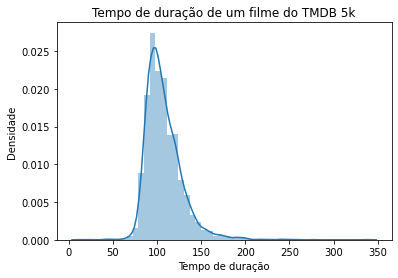

In [27]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna())
ax.set(xlabel="Tempo de duração",ylabel="Densidade")
ax.set_title("Tempo de duração de um filme do TMDB 5k")

Text(0.5, 1.0, 'Tempo de duração de um filme do TMDB 5k')

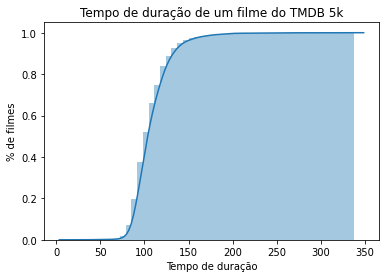

In [28]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna(), 
                  hist_kws={"cumulative":True},
                  kde_kws={"cumulative":True}
                  )
ax.set(xlabel="Tempo de duração",ylabel="% de filmes")
ax.set_title("Tempo de duração de um filme do TMDB 5k")

In [29]:
tmdb.query("runtime > 0").runtime.dropna().quantile(0.8)

121.0

#Movielens: média dos filmes com pelo menos 10 votos

In [30]:
nota_media_dos_filmes_com_pelo_menos_10_votos

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

In [31]:
nota_media_dos_filmes_com_pelo_menos_10_votos.mean()

3.4320503405352603

In [32]:
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

In [33]:
nota_media_dos_filmes_com_pelo_menos_10_votos[0:5].mean()

3.5259741603585653

In [34]:
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1,len(temp))]
medias[0:5]

[3.859375,
 3.5179227941176467,
 3.4494485294117645,
 3.5392140566332912,
 3.5202601341955218]

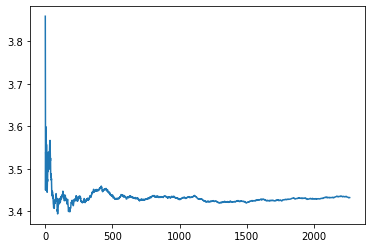

In [35]:
import matplotlib.pyplot as plt
plt.plot(medias)

In [36]:
from statsmodels.stats.weightstats import zconfint
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [37]:
from statsmodels.stats.weightstats import DescrStatsW
descre = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descre.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

#Vamos ver o filme 1

In [38]:
filmes = pd.read_csv("/content/drive/My Drive/Data Science Alura /Data Science: introdução a testes estatísticos com python/ml-latest-small/movies.csv")

In [39]:
filmes.query("movieId == 1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [40]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição das notas para Toy Story')

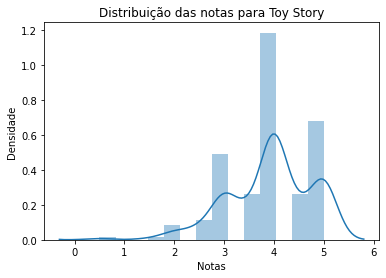

In [41]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel="Notas",ylabel="Densidade")
ax.set_title("Distribuição das notas para Toy Story")

[Text(0.5, 0, 'Notas')]

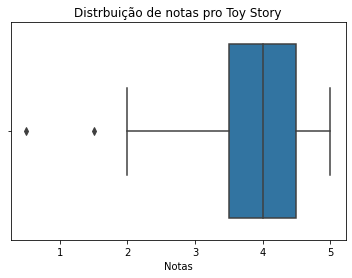

In [42]:
ax = sns.boxplot(x=notas1.rating)
ax.set_title("Distrbuição de notas pro Toy Story")
ax.set(xlabel="Notas")

In [43]:
notas1.rating.mean()

3.9209302325581397

In [44]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [45]:
from statsmodels.stats.weightstats import ztest
ztest(notas1.rating, value= nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

(8.586342305916716, 8.978190401886942e-18)

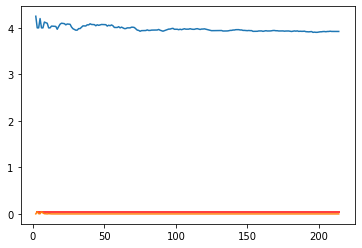

In [46]:
np.random.seed(75243)
temp = notas1.sample(frac=1).rating
def calcula_teste(i):
  media = temp[0:i].mean()
  stat,p =ztest(temp[0:i] , value=nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
  return (i,media,p)
valores =np.array([calcula_teste(i) for i in range(2,len(temp))])

plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y=0.05,xmin=2, xmax= len(temp),colors='r')

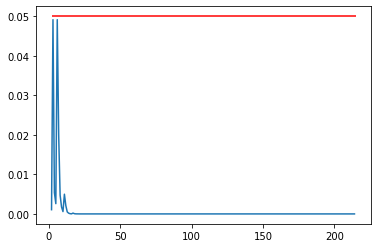

In [47]:
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y=0.05,xmin=2, xmax= len(temp),colors='r')

#Comparação de dois conjuntos de samples 

In [48]:
print(ztest(notas1.rating,notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [49]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas')

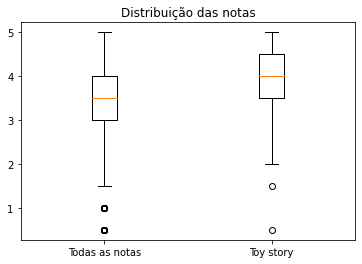

In [50]:
plt.boxplot([notas.rating,notas1.rating],labels=["Todas as notas","Toy story"])
plt.title("Distribuição das notas")

#comparar a média de dois filmes 

In [51]:
filmes.query("movieId in [1,593,72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Distribuição das notas')

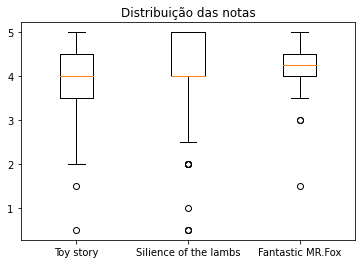

In [52]:
notas593 = notas.query("movieId == 593")
notas72226 = notas.query("movieId == 72226")

plt.boxplot([notas1.rating,notas593.rating,notas72226.rating],labels=["Toy story","Silience of the lambs","Fantastic MR.Fox"])
plt.title("Distribuição das notas")

In [53]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


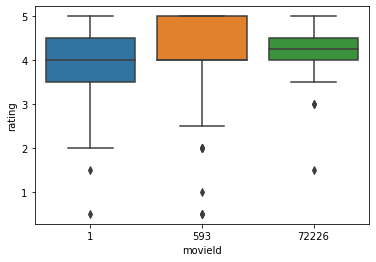

In [55]:
sns.boxplot(x="movieId",y="rating",data = notas.query("movieId in [1,593,72226]"))

In [61]:
notas.query("movieId in [1,593,72226]").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [58]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [62]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [63]:
comparacao = descr_1.get_compare(descr_72226)
comparacao.summary(use_t= True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [65]:
from scipy.stats import normaltest
_ , p =normaltest(notas1.rating)
print(p)

0.00011053430732728716


In [66]:
from scipy.stats import ranksums
_ , p= ranksums(notas1.rating,notas593.rating)
print(p)

0.0003267718756440693
